tabela filtrada:                   process         parent  UID  process_occurrences  fragmented
time_passed                                                                   
6.833333     EMT-1(21817)  nspr-2(16890)    0                   10           0
6.866667     EMT-1(21817)  nspr-2(16890)    0                   10           0
6.900000     EMT-1(21817)  nspr-2(16890)    0                   10           0
6.933333     EMT-1(21817)  nspr-2(16890)    0                   10           0
6.966667     EMT-1(21817)  nspr-2(16890)    0                   10           0
...                   ...            ...  ...                  ...         ...
113.700000   EMT-1(21817)  nspr-2(16890)    0                   19           0
113.733333   EMT-0(21817)  nspr-2(16890)    0                   22           0
113.733333   EMT-1(21817)  nspr-2(16890)    0                   19           0
113.766667   EMT-0(21817)  nspr-2(16890)    0                   22           0
113.766667   EMT-1(21817)  nspr-2(1

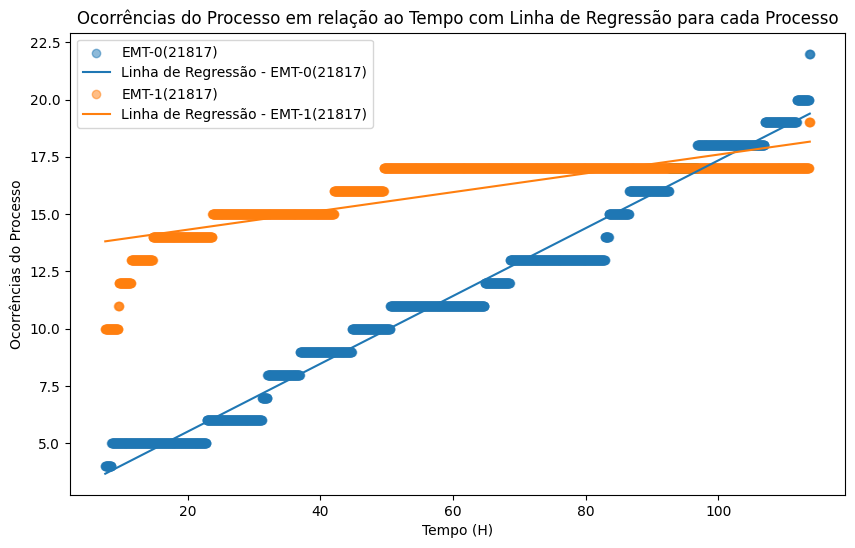

In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

def ler_csv():
  """
    Read CSV file and return DataFrame.
  """
  try:
    return pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fragmentation.csv", delimiter=";", header=0)

  except FileNotFoundError:
    print("File not found.")
    return None

  except Exception as e:
      print("An error occurred:", str(e))
      return None

data_frame = ler_csv()

# Convert the datetime column to a datetime object
data_frame['datetime'] = pd.to_datetime(data_frame['datetime'])

# Set the index to the datetime column
df = data_frame.set_index('datetime')

df['time_passed'] = (df.index - df.index[0]).total_seconds() / 3600

# Resetting the index to use 'time_passed' as index
df = df.set_index('time_passed')

df_filtered = df[df['process_occurrences'] >= 4]

print(f'tabela filtrada: {df_filtered}')

df_pivot = df_filtered.pivot(columns='process', values='process_occurrences')

print(f'tabela pivotada: {df_pivot}')

# df_pivot.plot(figsize=(10, 5), ylabel='Process occurrences', xlabel='Time(H)')

df_pivot = df_pivot.dropna()


X = df_pivot.index.values.reshape(-1, 1)

Y = df_pivot.iloc[:, 0].values


print(f'X: {X}')
print(f'Y: {Y}')



regression_model = LinearRegression().fit(X, Y)

r_squared = regression_model.score(X, Y)

# r_squared

# regression_model.coef_
# regression_model.intercept_



# Adicione uma constante ao x para estimar o intercepto (constante) na regressão
x_with_const = sm.add_constant(X)

# Ajuste o modelo de regressão com statsmodels
regression_model_sm = sm.OLS(Y, x_with_const).fit()

# Obtenha um resumo completo da regressão
regression_summary = regression_model_sm.summary()

# Imprima o resumo
print(regression_summary)









# Plotar os dados de ocorrência do processo em relação ao tempo para cada processo
plt.figure(figsize=(10, 6))

# Iterar sobre as colunas de df_pivot
for column in df_pivot.columns:
    # Obter os dados de ocorrência do processo e tempo para o processo atual
    Y_process = df_pivot[column].values
    X = df_pivot.index.values.reshape(-1, 1)
    Y = Y_process

    # Ajustar o modelo de regressão linear
    regression_model = LinearRegression().fit(X, Y)

    # Plotar os pontos de dados das ocorrências do processo em relação ao tempo para o processo atual
    plt.scatter(X, Y, label=f'{column}', alpha=0.5)

    # Plotar a linha de regressão para o processo atual
    plt.plot(X, regression_model.predict(X), label=f'Linha de Regressão - {column}')

# Adicionar rótulos e título ao gráfico
plt.xlabel('Tempo (H)')
plt.ylabel('Ocorrências do Processo')
plt.title('Ocorrências do Processo em relação ao Tempo com Linha de Regressão para cada Processo')
plt.legend()

# Exibir o gráfico
plt.show()